<h2 style = "color:darkblue"> Projeto Mega - V7.JF </h2>
<h3> Nova Análise Matemáticas incluindo numero do concurso sorteado</h3>
<img src = "imagens/LogoJoao-2019.png" alt="Nada" style = "float:left;width:100px; height:100px">

In [2]:
# imports iniciais 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.core.display import HTML

%matplotlib inline

In [3]:
df = pd.read_csv("data/dadosSomaDivMaxDivmin.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(5)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia
0,2.0,9.0,39.0,37.0,49.0,43.0,41.0,218.0,0.631884,10.380952,1.252047
1,3.0,36.0,30.0,10.0,11.0,29.0,47.0,163.0,0.472464,7.761905,0.936164
2,11.0,25.0,15.0,58.0,37.0,59.0,38.0,232.0,0.672464,11.047619,1.332454
3,17.0,10.0,20.0,6.0,19.0,51.0,13.0,119.0,0.344928,5.666667,0.683457
4,24.0,1.0,8.0,14.0,28.0,33.0,43.0,127.0,0.368116,6.047619,0.729404


In [6]:
df.sample(15)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia
309,1412.0,6.0,8.0,37.0,24.0,45.0,41.0,161.0,0.466667,7.666667,0.924677
44,216.0,35.0,42.0,59.0,18.0,30.0,14.0,198.0,0.573913,9.428571,1.137180
290,1354.0,2.0,42.0,8.0,49.0,48.0,38.0,187.0,0.542029,8.904762,1.074004
151,740.0,29.0,47.0,12.0,50.0,16.0,28.0,182.0,0.527536,8.666667,1.045287
45,218.0,54.0,40.0,42.0,17.0,47.0,12.0,212.0,0.614493,10.095238,1.217587
52,245.0,44.0,51.0,27.0,53.0,8.0,60.0,243.0,0.704348,11.571429,1.395631
136,647.0,56.0,19.0,11.0,14.0,12.0,54.0,166.0,0.481159,7.904762,0.953394
153,753.0,59.0,35.0,43.0,22.0,7.0,2.0,168.0,0.486957,8.000000,0.964880
94,457.0,48.0,15.0,24.0,27.0,17.0,32.0,163.0,0.472464,7.761905,0.936164
215,1049.0,34.0,17.0,52.0,5.0,2.0,29.0,139.0,0.402899,6.619048,0.798324


<h2 style = "color:darkred">Atividade deste notebook:</h2>
<p>Neste notebook, farei um novo experimento envolvendo a soma dos 06 números sorteados e analisar se existe alguma caracteristica que possa levar a alguma previsão em sorteios futuros.<br>
    A idéia é usar a soma dos numeros sorteados e dividir pelo numero sequencial dos sorteios. Lembrando que os sorteios que aparecem nesta tabela vem a ser dos jogos que tiveram pelo menos 01 ganhador, ou seja, são os sorteios onde acertaram as 06 dezenas. <br>
    Pretendo envolver um novo parametro, o numero do sorteio, procurando relação com jogos que produziram ganhadores (acertadores). 
    </p>

In [7]:
#criação da nova coluna SomaPorJogo
df["SomaPorJogo"] = df['Soma']/df['Concurso']
df.head(10)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia,SomaPorJogo
0,2.0,9.0,39.0,37.0,49.0,43.0,41.0,218.0,0.631884,10.380952,1.252047,109.000000
1,3.0,36.0,30.0,10.0,11.0,29.0,47.0,163.0,0.472464,7.761905,0.936164,54.333333
2,11.0,25.0,15.0,58.0,37.0,59.0,38.0,232.0,0.672464,11.047619,1.332454,21.090909
3,17.0,10.0,20.0,6.0,19.0,51.0,13.0,119.0,0.344928,5.666667,0.683457,7.000000
4,24.0,1.0,8.0,14.0,28.0,33.0,43.0,127.0,0.368116,6.047619,0.729404,5.291667
5,29.0,14.0,56.0,58.0,8.0,43.0,3.0,182.0,0.527536,8.666667,1.045287,6.275862
6,33.0,5.0,33.0,49.0,17.0,42.0,39.0,185.0,0.536232,8.809524,1.062517,5.606061
7,41.0,38.0,26.0,35.0,39.0,12.0,47.0,197.0,0.571014,9.380952,1.131437,4.804878
8,49.0,33.0,7.0,43.0,35.0,13.0,55.0,186.0,0.539130,8.857143,1.068260,3.795918
9,54.0,5.0,21.0,9.0,56.0,18.0,36.0,145.0,0.420290,6.904762,0.832784,2.685185


In [8]:
df.tail(10)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia,SomaPorJogo
495,2118.0,41.0,11.0,12.0,46.0,20.0,40.0,170.0,0.492754,8.095238,0.976367,0.080264
496,2121.0,37.0,8.0,17.0,29.0,10.0,40.0,141.0,0.408696,6.714286,0.809810,0.066478
497,2131.0,28.0,18.0,20.0,6.0,2.0,3.0,77.0,0.223188,3.666667,0.442237,0.036133
498,2135.0,23.0,48.0,59.0,28.0,40.0,9.0,207.0,0.600000,9.857143,1.188870,0.096956
499,2150.0,38.0,24.0,23.0,26.0,42.0,49.0,202.0,0.585507,9.619048,1.160154,0.093953
500,2153.0,13.0,28.0,31.0,8.0,33.0,32.0,145.0,0.420290,6.904762,0.832784,0.067348
501,2161.0,24.0,10.0,8.0,44.0,9.0,42.0,137.0,0.397101,6.523810,0.786837,0.063397
502,2165.0,56.0,49.0,54.0,43.0,5.0,37.0,244.0,0.707246,11.619048,1.401374,0.112702
503,2168.0,37.0,25.0,29.0,4.0,1.0,27.0,123.0,0.356522,5.857143,0.706430,0.056734
504,2171.0,19.0,12.0,13.0,36.0,55.0,44.0,179.0,0.518841,8.523810,1.028057,0.082450


In [9]:
df.sample(15)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma,Divsqmax,Divsqmin,Divmedia,SomaPorJogo
220,1058.0,20.0,51.0,57.0,45.0,24.0,18.0,215.0,0.623188,10.238095,1.234817,0.203214
401,1681.0,1.0,33.0,8.0,11.0,6.0,50.0,109.0,0.315942,5.190476,0.626024,0.064842
341,1508.0,58.0,39.0,18.0,17.0,35.0,30.0,197.0,0.571014,9.380952,1.131437,0.130637
225,1077.0,11.0,6.0,18.0,5.0,37.0,9.0,86.0,0.249275,4.095238,0.493927,0.079851
277,1316.0,48.0,34.0,25.0,42.0,13.0,8.0,170.0,0.492754,8.095238,0.976367,0.129179
230,1098.0,30.0,20.0,21.0,11.0,50.0,52.0,184.0,0.533333,8.761905,1.056774,0.167577
402,1683.0,48.0,4.0,12.0,34.0,32.0,33.0,163.0,0.472464,7.761905,0.936164,0.096851
249,1170.0,46.0,11.0,27.0,34.0,49.0,13.0,180.0,0.521739,8.571429,1.033800,0.153846
12,73.0,57.0,25.0,45.0,28.0,51.0,26.0,232.0,0.672464,11.047619,1.332454,3.178082
219,1056.0,38.0,8.0,50.0,53.0,59.0,6.0,214.0,0.620290,10.190476,1.229074,0.202652


<h2 style = "color:darkgreen">Grafico:</h2>
<p> Após o calculo da coluna SomaPorJogo, que representa a divisão da soma dos 06 números pelo respectivo numero de sorteio, verificar de forma gráfica o coportamento das curvas. <br>
    Muito embora sabe-se que o numero dos jogos aumenta do acrescimo de uma unidade a cada jogo o numero do sorteio positivo, ou seja, que produz ganhador não possui uma sequencia definida assim vejamos o que surge com o grafico.</p>

<function matplotlib.pyplot.show(*args, **kw)>

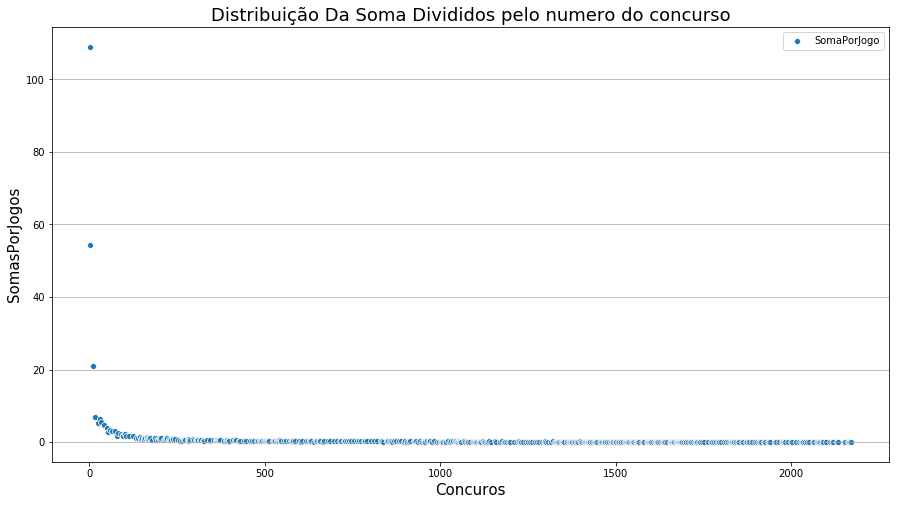

In [10]:
#Grafico scaterplot

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x="Concurso", y="SomaPorJogo", label="SomaPorJogo", data= df)

ax.set_title('Distribuição Da Soma Divididos pelo numero do concurso', fontsize=18)

plt.legend()
plt.ylabel('SomasPorJogos', fontsize= 15)
plt.xlabel('Concuros', fontsize= 15)
plt.grid(axis='y')
plt.show

<p> Observando o grafico, para uma análise mais apurada vou eliminar os 30 primeiros jogos vencedores, onde o numero dos sorteios são muito baixos e analisar melhor os resultados da sequencia.</p>